In [41]:
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plotter

# Drawing signal spectrum :: FFT command

In [42]:
# Sampling frequency
Fs = 100
# We use dot when dividing so it knows it will be a float
t = sp.arange(0,2,1./Fs)

In [43]:
# We define a signal
x = sp.cos(2*sp.pi*t*2)  + sp.cos(2*sp.pi*11*t)
# Applying the fft to our signal
X = sp.fft(x) 

<Container object of 3 artists>

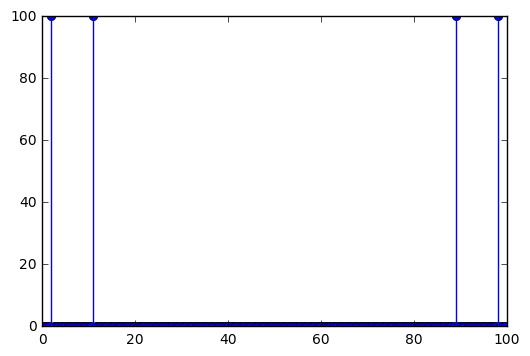

In [44]:
# Creating frequency axis
F = sp.linspace(0,Fs, len(X)+1)
F = F[:-1]

plotter.stem(F,sp.absolute(X))

In [45]:
N = len(X)

<Container object of 3 artists>

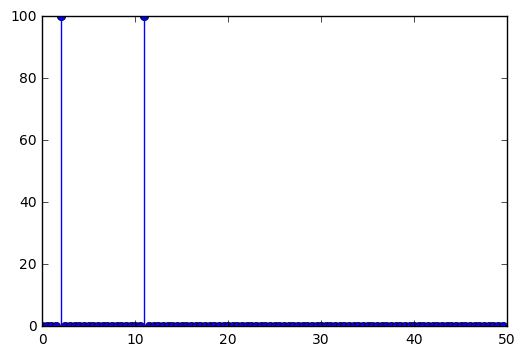

In [46]:
# Now we want just the first part of the spectrum
plotter.stem(F[0:int(N/2)], sp.absolute(X[0:int(N/2)])) 
# had to cast to int to avoid error since it expected int but we gave it float

In [47]:
# Defining signal that has a DC component
x1 = 3+ sp.cos(2*sp.pi*t*2)  + sp.cos(2*sp.pi*11*t) 

In [48]:
X1 = sp.fft(x1)

<Container object of 3 artists>

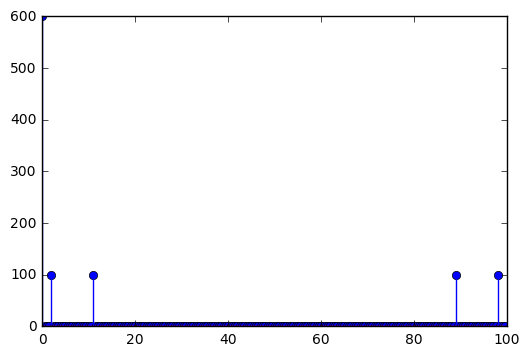

In [49]:
# Drawing spectrum. Take a look at the value at 0Hz 
plotter.stem(F, sp.absolute(X1))

<Container object of 3 artists>

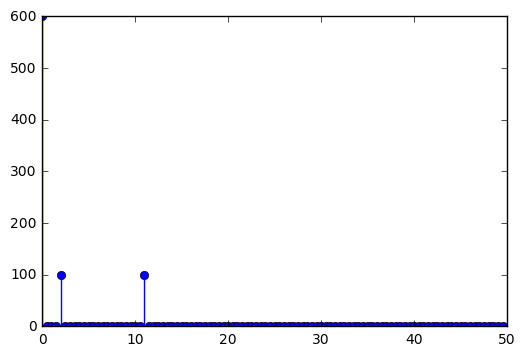

In [50]:
# Now we need to take the useful part of spectrum
# In practice signal length is taken as even number, its often a square number.
# In our case the length is 200, it would be best if we have chosen the signal length to be 256
plotter.stem(F[0:int(N/2)], sp.absolute(X1[0:int(N/2)]))

# Signal filtering

In [51]:
from scipy import signal

In [52]:
b,a  = signal.butter(4, 0.1)

# The f0 value from the  fo = F0 / (Fs/2).
# So if we want the limit of the filter at 5Hz, --> 5Hz / 50 Hz = 0.1 

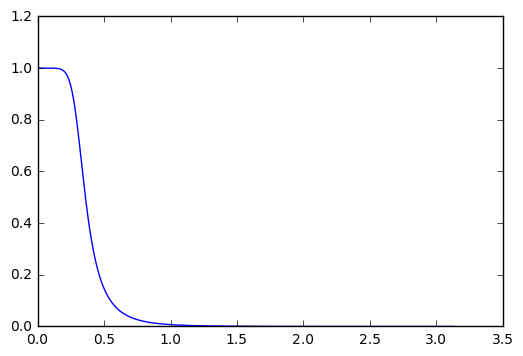

In [53]:
w,h = signal.freqz(b,a)

plotter.plot(w,sp.absolute(h))

# We can see that amplitude is calculated from 0 to Pi
# So we can scale the x axis to be in conjunction with sampling frequency

f_normalized = w / sp.pi
ff = f_normalized * (Fs/2)

In [54]:
# now we filter the x signal
y= signal.lfilter(b,a,x)

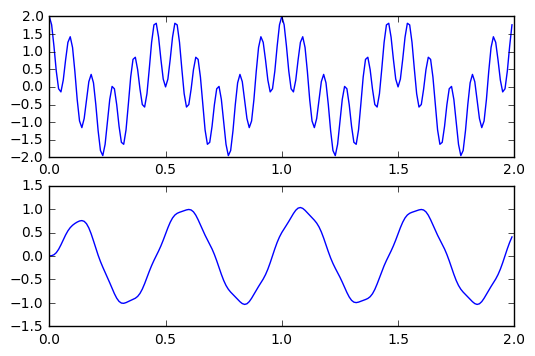

In [55]:
plotter.subplot(211)
plotter.plot(t,x)
plotter.subplot(212)
plotter.plot(t,y)

In [56]:
# now we filter the x1 signal
y1 = signal.lfilter(b,a,x1)

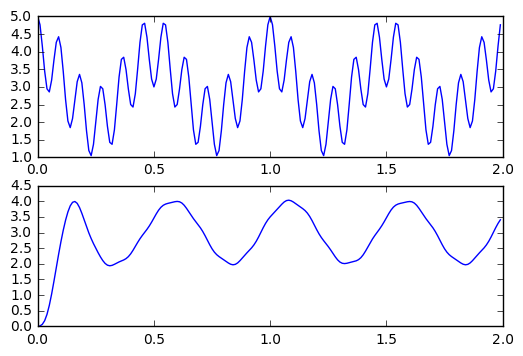

In [58]:
plotter.subplot(211)
plotter.plot(t,x1)
plotter.subplot(212)
plotter.plot(t,y1)

In [59]:
b

array([ 0.0004166,  0.0016664,  0.0024996,  0.0016664,  0.0004166])

In [60]:
a

array([ 1.        , -3.18063855,  3.86119435, -2.11215536,  0.43826514])

In [61]:
Y1 = sp.fft(y1)

<Container object of 3 artists>

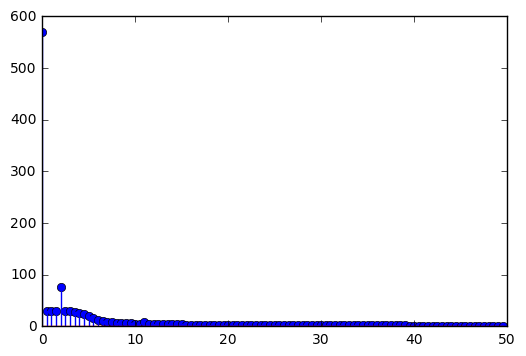

In [62]:
plotter.stem(F[0:int(N/2)], sp.absolute(Y1[0:int(N/2)]))

# Bandpass filter

In [63]:
bp, ap = signal.butter(5, [0.01, 0.1], btype='bandpass')

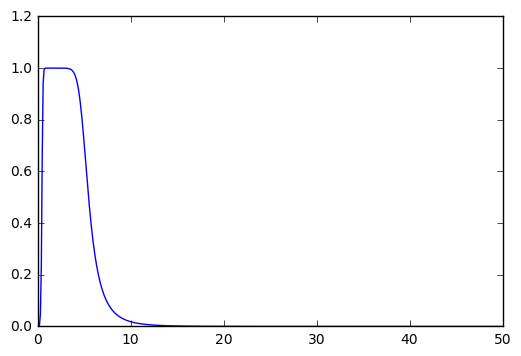

In [65]:
wp,hp = signal.freqz(bp,ap)
plotter.plot(wp * (Fs/2) / sp.pi , sp.absolute(hp) )

In [66]:
y2 = signal.lfilter(bp,ap, x1)

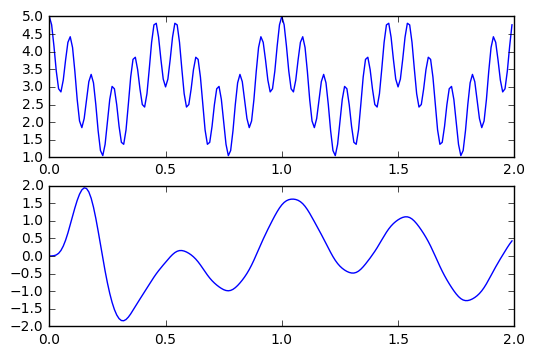

In [67]:
plt.subplot(211)
plt.plot(t, x1)
plt.subplot(212)
plt.plot(t, y2)

In [68]:
# Checking the steady state 

t = sp.arange(0,10,1./Fs)
x1 = 3+ sp.cos(2*sp.pi*t*2)  + sp.cos(2*sp.pi*11*t) 

In [69]:
y2 = signal.lfilter(bp,ap, x1)

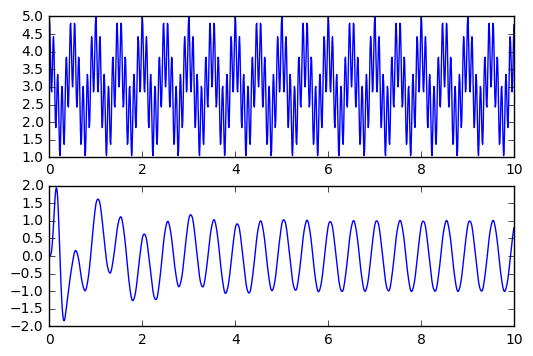

In [70]:
plotter.subplot(211)
plotter.plot(t, x1)
plotter.subplot(212)
plotter.plot(t, y2)

In [71]:
# Now we try to decrease the Butterworth filter order
# And also increase the order to see what happens

In [72]:
Fs = 1000 # increase in the sampling rate
t = sp.arange(0,10,1./Fs)
x1 = 3+ sp.cos(2*sp.pi*t*2)  + sp.cos(2*sp.pi*11*t) 

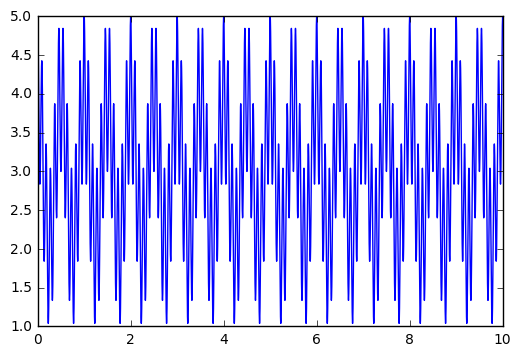

In [73]:
plotter.plot(t, x1)

In [74]:
# 1 Hz / (1000Hz /2)  
bp1, ap1 = signal.butter(5, [0.002, 0.02], btype='bandpass')

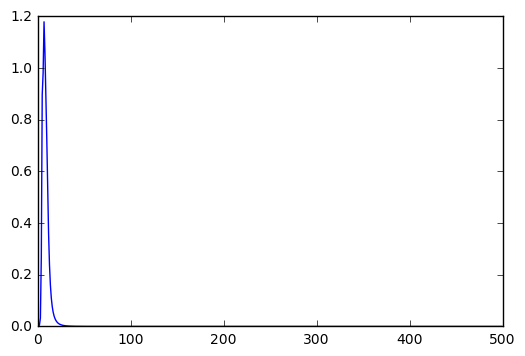

In [75]:
wp1,hp1 = signal.freqz(bp1,ap1)
plt.plot(wp * (Fs/2) / sp.pi , sp.absolute(hp1) )

In [76]:
y3 = signal.lfilter(bp1,ap1,x1)

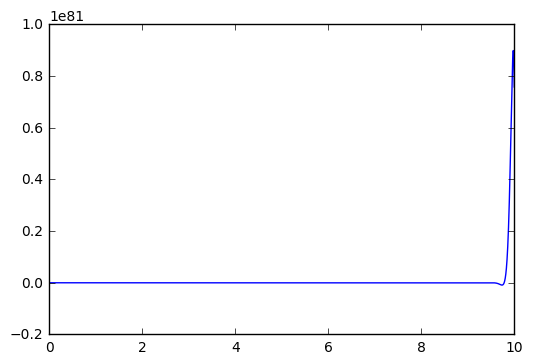

In [77]:
plt.plot(t,y3)